In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import kernel
from deflected_subgradient import solveDeflected
from SVR import SVR
import matplotlib.pyplot as plt
import random
import copy

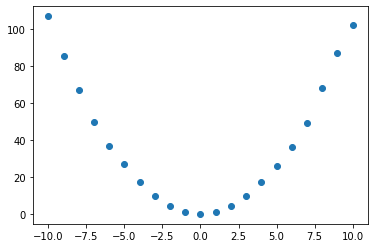

In [2]:
x = np.vstack(np.arange(-10,11,1))
degree = 2
noising_factor = 0.1
y = [xi**degree for xi in x]
y = [ yi + noising_factor * (np.random.rand()*yi) for yi in y]
y=np.array(y)
plt.scatter(x,y)
plt.show()

In [3]:
svr = SVR("poly", {"degree":degree, "gamma": 'scale'})
svr.fit(x, y, {'eps':1e-2, 'maxiter':3e3})

i:    0 - v: 0.000000 - fref:  inf - ||g||: 235.658028 - delta: 0.000000e+00 - ||gdiff||:  inf - eps: 1.000000e-02
i:    1 - v: -0.000044 - fref: 0.000000 - ||g||: 235.477986 - delta: 1.000000e-04 - ||gdiff||: 0.180042 - eps: 1.000000e-02
i:    2 - v: -0.003453 - fref: -0.000044 - ||g||: 235.477441 - delta: 1.000000e-02 - ||gdiff||: 0.000545 - eps: 1.000000e-02
i:    3 - v: -0.006640 - fref: -0.003453 - ||g||: 235.476932 - delta: 1.000000e-02 - ||gdiff||: 0.000510 - eps: 1.000000e-02
i:    4 - v: -0.009767 - fref: -0.006640 - ||g||: 235.476432 - delta: 1.000000e-02 - ||gdiff||: 0.000500 - eps: 1.000000e-02
i:    5 - v: -0.012875 - fref: -0.009767 - ||g||: 235.475935 - delta: 1.000000e-02 - ||gdiff||: 0.000497 - eps: 1.000000e-02
i:    6 - v: -0.015978 - fref: -0.012875 - ||g||: 235.475439 - delta: 1.000000e-02 - ||gdiff||: 0.000496 - eps: 1.000000e-02
i:    7 - v: -0.019080 - fref: -0.015978 - ||g||: 235.474943 - delta: 1.000000e-02 - ||gdiff||: 0.000496 - eps: 1.000000e-02
i:    8 - v

i:  283 - v: -0.874967 - fref: -0.871866 - ||g||: 235.338073 - delta: 1.000000e-02 - ||gdiff||: 0.000496 - eps: 1.000000e-02
i:  284 - v: -0.878068 - fref: -0.874967 - ||g||: 235.337577 - delta: 1.000000e-02 - ||gdiff||: 0.000496 - eps: 1.000000e-02
i:  285 - v: -0.881169 - fref: -0.878068 - ||g||: 235.337081 - delta: 1.000000e-02 - ||gdiff||: 0.000496 - eps: 1.000000e-02
i:  286 - v: -0.884270 - fref: -0.881169 - ||g||: 235.336585 - delta: 1.000000e-02 - ||gdiff||: 0.000496 - eps: 1.000000e-02
i:  287 - v: -0.887371 - fref: -0.884270 - ||g||: 235.336089 - delta: 1.000000e-02 - ||gdiff||: 0.000496 - eps: 1.000000e-02
i:  288 - v: -0.890472 - fref: -0.887371 - ||g||: 235.335593 - delta: 1.000000e-02 - ||gdiff||: 0.000496 - eps: 1.000000e-02
i:  289 - v: -0.893573 - fref: -0.890472 - ||g||: 235.335097 - delta: 1.000000e-02 - ||gdiff||: 0.000496 - eps: 1.000000e-02
i:  290 - v: -0.896674 - fref: -0.893573 - ||g||: 235.334601 - delta: 1.000000e-02 - ||gdiff||: 0.000496 - eps: 1.000000e-02


i:  564 - v: -2.106872 - fref: -2.100359 - ||g||: 235.140932 - delta: 2.100359e-02 - ||gdiff||: 0.001043 - eps: 1.000000e-02
i:  565 - v: -2.113406 - fref: -2.106872 - ||g||: 235.139886 - delta: 2.106872e-02 - ||gdiff||: 0.001046 - eps: 1.000000e-02
i:  566 - v: -2.119959 - fref: -2.113406 - ||g||: 235.138837 - delta: 2.113406e-02 - ||gdiff||: 0.001049 - eps: 1.000000e-02
i:  567 - v: -2.126533 - fref: -2.119959 - ||g||: 235.137784 - delta: 2.119959e-02 - ||gdiff||: 0.001052 - eps: 1.000000e-02
i:  568 - v: -2.133128 - fref: -2.126533 - ||g||: 235.136729 - delta: 2.126533e-02 - ||gdiff||: 0.001056 - eps: 1.000000e-02
i:  569 - v: -2.139743 - fref: -2.133128 - ||g||: 235.135670 - delta: 2.133128e-02 - ||gdiff||: 0.001059 - eps: 1.000000e-02
i:  570 - v: -2.146378 - fref: -2.139743 - ||g||: 235.134607 - delta: 2.139743e-02 - ||gdiff||: 0.001062 - eps: 1.000000e-02
i:  571 - v: -2.153034 - fref: -2.146378 - ||g||: 235.133542 - delta: 2.146378e-02 - ||gdiff||: 0.001066 - eps: 1.000000e-02


i:  847 - v: -5.060362 - fref: -5.044718 - ||g||: 234.667614 - delta: 5.044718e-02 - ||gdiff||: 0.002510 - eps: 1.000000e-02
i:  848 - v: -5.076054 - fref: -5.060362 - ||g||: 234.665097 - delta: 5.060362e-02 - ||gdiff||: 0.002517 - eps: 1.000000e-02
i:  849 - v: -5.091795 - fref: -5.076054 - ||g||: 234.662572 - delta: 5.076054e-02 - ||gdiff||: 0.002525 - eps: 1.000000e-02
i:  850 - v: -5.107585 - fref: -5.091795 - ||g||: 234.660039 - delta: 5.091795e-02 - ||gdiff||: 0.002533 - eps: 1.000000e-02
i:  851 - v: -5.123424 - fref: -5.107585 - ||g||: 234.657498 - delta: 5.107585e-02 - ||gdiff||: 0.002541 - eps: 1.000000e-02
i:  852 - v: -5.139312 - fref: -5.123424 - ||g||: 234.654949 - delta: 5.123424e-02 - ||gdiff||: 0.002549 - eps: 1.000000e-02
i:  853 - v: -5.155249 - fref: -5.139312 - ||g||: 234.652392 - delta: 5.139312e-02 - ||gdiff||: 0.002557 - eps: 1.000000e-02
i:  854 - v: -5.171235 - fref: -5.155249 - ||g||: 234.649828 - delta: 5.155249e-02 - ||gdiff||: 0.002565 - eps: 1.000000e-02


i: 1123 - v: -11.893517 - fref: -11.856749 - ||g||: 233.568884 - delta: 1.185675e-01 - ||gdiff||: 0.005926 - eps: 1.000000e-02
i: 1124 - v: -11.930398 - fref: -11.893517 - ||g||: 233.562940 - delta: 1.189352e-01 - ||gdiff||: 0.005944 - eps: 1.000000e-02
i: 1125 - v: -11.967394 - fref: -11.930398 - ||g||: 233.556977 - delta: 1.193040e-01 - ||gdiff||: 0.005963 - eps: 1.000000e-02
i: 1126 - v: -12.004505 - fref: -11.967394 - ||g||: 233.550995 - delta: 1.196739e-01 - ||gdiff||: 0.005982 - eps: 1.000000e-02
i: 1127 - v: -12.041731 - fref: -12.004505 - ||g||: 233.544995 - delta: 1.200451e-01 - ||gdiff||: 0.006000 - eps: 1.000000e-02
i: 1128 - v: -12.079073 - fref: -12.041731 - ||g||: 233.538976 - delta: 1.204173e-01 - ||gdiff||: 0.006019 - eps: 1.000000e-02
i: 1129 - v: -12.116530 - fref: -12.079073 - ||g||: 233.532938 - delta: 1.207907e-01 - ||gdiff||: 0.006038 - eps: 1.000000e-02
i: 1130 - v: -12.154103 - fref: -12.116530 - ||g||: 233.526881 - delta: 1.211653e-01 - ||gdiff||: 0.006057 - ep

i: 1383 - v: -26.602347 - fref: -26.520110 - ||g||: 231.186114 - delta: 2.652011e-01 - ||gdiff||: 0.013390 - eps: 1.000000e-02
i: 1384 - v: -26.684840 - fref: -26.602347 - ||g||: 231.172681 - delta: 2.660235e-01 - ||gdiff||: 0.013433 - eps: 1.000000e-02
i: 1385 - v: -26.767588 - fref: -26.684840 - ||g||: 231.159206 - delta: 2.668484e-01 - ||gdiff||: 0.013475 - eps: 1.000000e-02
i: 1386 - v: -26.850592 - fref: -26.767588 - ||g||: 231.145689 - delta: 2.676759e-01 - ||gdiff||: 0.013518 - eps: 1.000000e-02
i: 1387 - v: -26.933855 - fref: -26.850592 - ||g||: 231.132129 - delta: 2.685059e-01 - ||gdiff||: 0.013560 - eps: 1.000000e-02
i: 1388 - v: -27.017375 - fref: -26.933855 - ||g||: 231.118526 - delta: 2.693385e-01 - ||gdiff||: 0.013603 - eps: 1.000000e-02
i: 1389 - v: -27.101154 - fref: -27.017375 - ||g||: 231.104880 - delta: 2.701737e-01 - ||gdiff||: 0.013646 - eps: 1.000000e-02
i: 1390 - v: -27.185193 - fref: -27.101154 - ||g||: 231.091190 - delta: 2.710115e-01 - ||gdiff||: 0.013689 - ep

i: 1654 - v: -61.561626 - fref: -61.371326 - ||g||: 225.422040 - delta: 6.137133e-01 - ||gdiff||: 0.031775 - eps: 1.000000e-02
i: 1655 - v: -61.752516 - fref: -61.561626 - ||g||: 225.390162 - delta: 6.156163e-01 - ||gdiff||: 0.031878 - eps: 1.000000e-02
i: 1656 - v: -61.943999 - fref: -61.752516 - ||g||: 225.358181 - delta: 6.175252e-01 - ||gdiff||: 0.031981 - eps: 1.000000e-02
i: 1657 - v: -62.136075 - fref: -61.943999 - ||g||: 225.326096 - delta: 6.194400e-01 - ||gdiff||: 0.032085 - eps: 1.000000e-02
i: 1658 - v: -62.328746 - fref: -62.136075 - ||g||: 225.293908 - delta: 6.213607e-01 - ||gdiff||: 0.032189 - eps: 1.000000e-02
i: 1659 - v: -62.522015 - fref: -62.328746 - ||g||: 225.261614 - delta: 6.232875e-01 - ||gdiff||: 0.032293 - eps: 1.000000e-02
i: 1660 - v: -62.715883 - fref: -62.522015 - ||g||: 225.229216 - delta: 6.252201e-01 - ||gdiff||: 0.032398 - eps: 1.000000e-02
i: 1661 - v: -62.910352 - fref: -62.715883 - ||g||: 225.196713 - delta: 6.271588e-01 - ||gdiff||: 0.032503 - ep

i: 1925 - v: -142.453070 - fref: -142.012772 - ||g||: 211.484741 - delta: 1.420128e+00 - ||gdiff||: 0.078340 - eps: 1.000000e-02
i: 1926 - v: -142.894733 - fref: -142.453070 - ||g||: 211.406129 - delta: 1.424531e+00 - ||gdiff||: 0.078612 - eps: 1.000000e-02
i: 1927 - v: -143.337765 - fref: -142.894733 - ||g||: 211.327244 - delta: 1.428947e+00 - ||gdiff||: 0.078885 - eps: 1.000000e-02
i: 1928 - v: -143.782170 - fref: -143.337765 - ||g||: 211.248084 - delta: 1.433378e+00 - ||gdiff||: 0.079159 - eps: 1.000000e-02
i: 1929 - v: -144.227953 - fref: -143.782170 - ||g||: 211.168650 - delta: 1.437822e+00 - ||gdiff||: 0.079435 - eps: 1.000000e-02
i: 1930 - v: -144.675118 - fref: -144.227953 - ||g||: 211.088939 - delta: 1.442280e+00 - ||gdiff||: 0.079711 - eps: 1.000000e-02
i: 1931 - v: -145.123668 - fref: -144.675118 - ||g||: 211.008951 - delta: 1.446751e+00 - ||gdiff||: 0.079988 - eps: 1.000000e-02
i: 1932 - v: -145.573609 - fref: -145.123668 - ||g||: 210.928685 - delta: 1.451237e+00 - ||gdiff|

i: 2181 - v: -314.490823 - fref: -313.646780 - ||g||: 178.266774 - delta: 3.136468e+00 - ||gdiff||: 0.179097 - eps: 1.000000e-02
i: 2182 - v: -315.266512 - fref: -314.490823 - ||g||: 178.101328 - delta: 3.144908e+00 - ||gdiff||: 0.165446 - eps: 1.000000e-02
i: 2183 - v: -316.044127 - fref: -315.266512 - ||g||: 177.935316 - delta: 3.152665e+00 - ||gdiff||: 0.166012 - eps: 1.000000e-02
i: 2184 - v: -316.823652 - fref: -316.044127 - ||g||: 177.768740 - delta: 3.160441e+00 - ||gdiff||: 0.166576 - eps: 1.000000e-02
i: 2185 - v: -317.605085 - fref: -316.823652 - ||g||: 177.601598 - delta: 3.168237e+00 - ||gdiff||: 0.167142 - eps: 1.000000e-02
i: 2186 - v: -318.388430 - fref: -317.605085 - ||g||: 177.433888 - delta: 3.176051e+00 - ||gdiff||: 0.167710 - eps: 1.000000e-02
i: 2187 - v: -319.173690 - fref: -318.388430 - ||g||: 177.265608 - delta: 3.183884e+00 - ||gdiff||: 0.168280 - eps: 1.000000e-02
i: 2188 - v: -319.960870 - fref: -319.173690 - ||g||: 177.096754 - delta: 3.191737e+00 - ||gdiff|

i: 2448 - v: -438.413851 - fref: -438.264638 - ||g||: 149.270434 - delta: 4.382646e+00 - ||gdiff||: 0.040844 - eps: 1.000000e-02
i: 2449 - v: -438.563108 - fref: -438.413851 - ||g||: 149.229566 - delta: 4.384139e+00 - ||gdiff||: 0.040868 - eps: 1.000000e-02
i: 2450 - v: -438.712409 - fref: -438.563108 - ||g||: 149.188674 - delta: 4.385631e+00 - ||gdiff||: 0.040892 - eps: 1.000000e-02
i: 2451 - v: -438.861754 - fref: -438.712409 - ||g||: 149.147758 - delta: 4.387124e+00 - ||gdiff||: 0.040916 - eps: 1.000000e-02
i: 2452 - v: -439.011143 - fref: -438.861754 - ||g||: 149.106818 - delta: 4.388618e+00 - ||gdiff||: 0.040940 - eps: 1.000000e-02
i: 2453 - v: -439.160575 - fref: -439.011143 - ||g||: 149.065853 - delta: 4.390111e+00 - ||gdiff||: 0.040964 - eps: 1.000000e-02
i: 2454 - v: -439.310051 - fref: -439.160575 - ||g||: 149.024864 - delta: 4.391606e+00 - ||gdiff||: 0.040989 - eps: 1.000000e-02
i: 2455 - v: -439.459571 - fref: -439.310051 - ||g||: 148.983852 - delta: 4.393101e+00 - ||gdiff|

i: 2713 - v: -462.272211 - fref: -462.253842 - ||g||: 142.433632 - delta: 4.622538e+00 - ||gdiff||: 0.005730 - eps: 1.000000e-02
i: 2714 - v: -462.290582 - fref: -462.272211 - ||g||: 142.427901 - delta: 4.622722e+00 - ||gdiff||: 0.005731 - eps: 1.000000e-02
i: 2715 - v: -462.308952 - fref: -462.290582 - ||g||: 142.422170 - delta: 4.622906e+00 - ||gdiff||: 0.005731 - eps: 1.000000e-02
i: 2716 - v: -462.327323 - fref: -462.308952 - ||g||: 142.416439 - delta: 4.623090e+00 - ||gdiff||: 0.005732 - eps: 1.000000e-02
i: 2717 - v: -462.345695 - fref: -462.327323 - ||g||: 142.410707 - delta: 4.623273e+00 - ||gdiff||: 0.005732 - eps: 1.000000e-02
i: 2718 - v: -462.364067 - fref: -462.345695 - ||g||: 142.404974 - delta: 4.623457e+00 - ||gdiff||: 0.005732 - eps: 1.000000e-02
i: 2719 - v: -462.382440 - fref: -462.364067 - ||g||: 142.399241 - delta: 4.623641e+00 - ||gdiff||: 0.005733 - eps: 1.000000e-02
i: 2720 - v: -462.400813 - fref: -462.382440 - ||g||: 142.393508 - delta: 4.623824e+00 - ||gdiff|

i: 2976 - v: -467.119416 - fref: -467.100926 - ||g||: 140.912015 - delta: 4.671009e+00 - ||gdiff||: 0.005841 - eps: 1.000000e-02
i: 2977 - v: -467.137906 - fref: -467.119416 - ||g||: 140.906174 - delta: 4.671194e+00 - ||gdiff||: 0.005841 - eps: 1.000000e-02
i: 2978 - v: -467.156397 - fref: -467.137906 - ||g||: 140.900332 - delta: 4.671379e+00 - ||gdiff||: 0.005842 - eps: 1.000000e-02
i: 2979 - v: -467.174889 - fref: -467.156397 - ||g||: 140.894490 - delta: 4.671564e+00 - ||gdiff||: 0.005842 - eps: 1.000000e-02
i: 2980 - v: -467.193381 - fref: -467.174889 - ||g||: 140.888647 - delta: 4.671749e+00 - ||gdiff||: 0.005843 - eps: 1.000000e-02
i: 2981 - v: -467.211873 - fref: -467.193381 - ||g||: 140.882804 - delta: 4.671934e+00 - ||gdiff||: 0.005843 - eps: 1.000000e-02
i: 2982 - v: -467.230366 - fref: -467.211873 - ||g||: 140.876960 - delta: 4.672119e+00 - ||gdiff||: 0.005844 - eps: 1.000000e-02
i: 2983 - v: -467.248860 - fref: -467.230366 - ||g||: 140.871116 - delta: 4.672304e+00 - ||gdiff|

b: [22.80252038]
Gamma: 0.027272727272727275 - Box: 1.0
PREDICTION (INPUT = 12) [[83.37567068]]
LOSS: [8796.08889655]


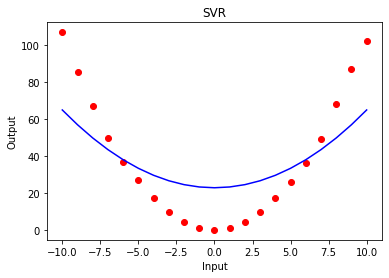

In [4]:
to_predict = 12
pred = svr.predict(to_predict)
print(f"b: {svr.intercept}")
print(f"Gamma: {svr.gamma_value} - Box: {svr.box}")
print(f'PREDICTION (INPUT = {to_predict})', pred)
pred = [float(svr.predict(np.array([x[i]]))) for i in range(x.size)]
print("LOSS:", svr.eps_ins_loss(pred))
plt.scatter(x, y , color="red")
plt.plot(x, pred, color="blue")
plt.title('SVR')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

 b: [0.0502566]
Gamma: auto - Box: 1.0
PREDICTION (INPUT = 12) [151.51159139]


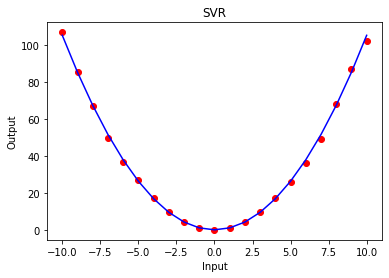

In [5]:
import sklearn.svm as ss
regressor = ss.SVR(kernel = 'poly', degree=degree, gamma='auto')

# sc_X = StandardScaler()
# sc_y = StandardScaler()
# xs = sc_X.fit_transform(x)
# ys = sc_y.fit_transform(y)
xs = x
ys = y

regressor.fit(xs, ys.ravel())
y_pred = regressor.predict(np.array([[to_predict]]))
print(f" b: {regressor.intercept_}")
print(f"Gamma: {regressor.get_params()['gamma']} - Box: {regressor.get_params()['C']}")
print(f'PREDICTION (INPUT = {to_predict})', y_pred)

plt.scatter(xs, ys, color = 'red')
plt.plot(xs, regressor.predict(xs), color = 'blue')
plt.title('SVR')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

In [6]:
print("eps:",regressor.epsilon)
print("b:",regressor.intercept_)
params = regressor.get_params()
print("gamma:",params['gamma'])
print("C:",params['C'])
print("sv:",regressor.support_vectors_)
print("supp index:",regressor.support_)

eps: 0.1
b: [0.0502566]
gamma: auto
C: 1.0
sv: [[-10.]
 [ -9.]
 [ -8.]
 [ -7.]
 [ -6.]
 [ -5.]
 [ -4.]
 [ -3.]
 [  1.]
 [  2.]
 [  3.]
 [  4.]
 [  5.]
 [  6.]
 [  7.]
 [  8.]
 [  9.]
 [ 10.]]
supp index: [ 0  1  2  3  4  5  6  7 11 12 13 14 15 16 17 18 19 20]


In [7]:
params["coef0"]

0.0

In [8]:
regressor.dual_coef_

array([[ 1.        ,  0.55064769, -1.        , -1.        , -1.        ,
         1.        ,  1.        ,  1.        , -0.55064769, -1.        ,
         1.        ,  1.        , -1.        , -1.        , -1.        ,
         1.        ,  1.        , -1.        ]])